# Kansas City Zoning Districts

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

In [2]:
kc_zones_url = "https://maps.wycokck.org/gisdata/shp/zoning_py.zip"

In [3]:
kck_wards = gpd.read_file("https://maps.wycokck.org/gisdata/shp/ward_prec_py.zip")

In [4]:
armourdale_ward = '06'

In [18]:
armourdale = kck_wards[kck_wards['WARD'] == armourdale_ward]
armourdale

,VTD,VTD_S,CITY,CITY_CODE,CITY_PREF,WARD,PRECINCT,BPU,UG,KS_HOUSE,...,BPU_At_Lg1,BPU_At_Lg2,BPU_At_Lg3,DATE_MOD,DATE_ADDED,MOD_BY,ADDED_BY,Shape_Leng,Shape_Area,geometry
68,KC06-02,600310,Kansas City,1,KC,06,02,3,2,37,...,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07,"POLYGON ((2257706.000 296463.281, 2258080.500 ..."
74,KC06-01,600300,Kansas City,1,KC,06,01,3,2,37,...,None,None,None,2023-01-09,2023-01-09,ccooley,GIS_EDITOR,30244.383320,4.474095e+07,"POLYGON ((2274619.250 294173.125, 2274657.750 ..."


In [19]:
armourdale.dissolve("CITY")

,geometry,VTD,VTD_S,CITY_CODE,CITY_PREF,WARD,PRECINCT,BPU,UG,KS_HOUSE,...,BPU_Member,BPU_At_Lg1,BPU_At_Lg2,BPU_At_Lg3,DATE_MOD,DATE_ADDED,MOD_BY,ADDED_BY,Shape_Leng,Shape_Area
CITY,,,,,,,,,,,,,,,,,,,,,
Kansas City,"POLYGON ((2274657.750 293923.782, 2274677.000 ...",KC06-02,600310,1,KC,06,02,3,2,37,...,None,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07


In [7]:
# kc_zones = gpd.read_file(kc_zones_url, bbox=(2.26e6,287900,2.275e6,294500))
kc_zones = gpd.read_file(kc_zones_url, mask=armourdale.dissolve("CITY"))


In [25]:
wy_bg = gpd.read_file('../../data/spatial_data/wyandotte_blockgroups.gpkg')

In [20]:
armourdale = armourdale.dissolve("CITY")

In [23]:
kc_zones = kc_zones.to_crs(epsg=4326)

In [24]:
armourdale = armourdale.to_crs(epsg=4326)

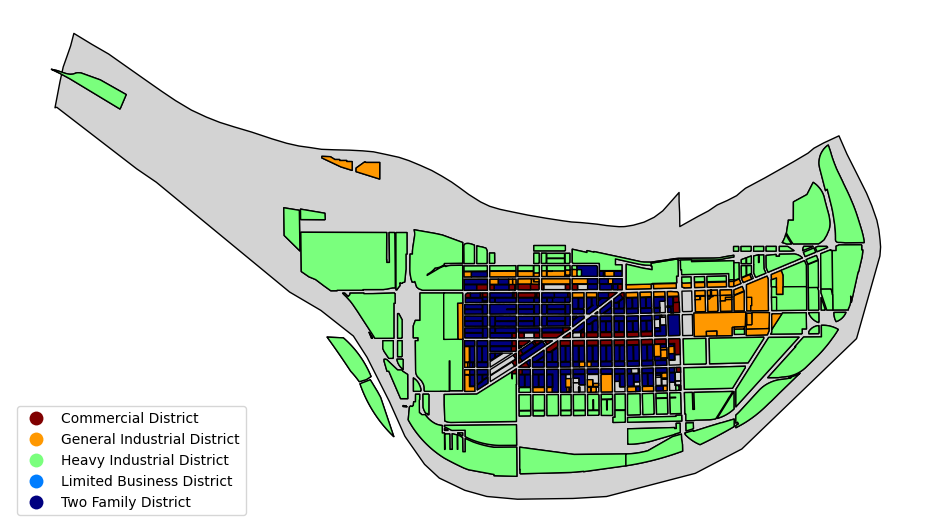

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
kc_zones.plot(ax=ax, ec='k', fc='None')
kc_zones[~kc_zones['ZONENAME'].str.contains('Planned')].plot(ax=ax, 
                                                             column='ZONENAME',
                                                             categorical=True, 
                                                             ec='k',
                                                             legend=True, 
                                                             legend_kwds=dict(ncols=1, 
                                                                              loc='lower left'), 
                                                             cmap='jet_r')
armourdale.plot(ax=ax, fc='lightgray', ec='k', zorder=-1)
# ax.minorticks_on()
# ax.grid(color='k')
plt.tight_layout()
ax.set_axis_off()

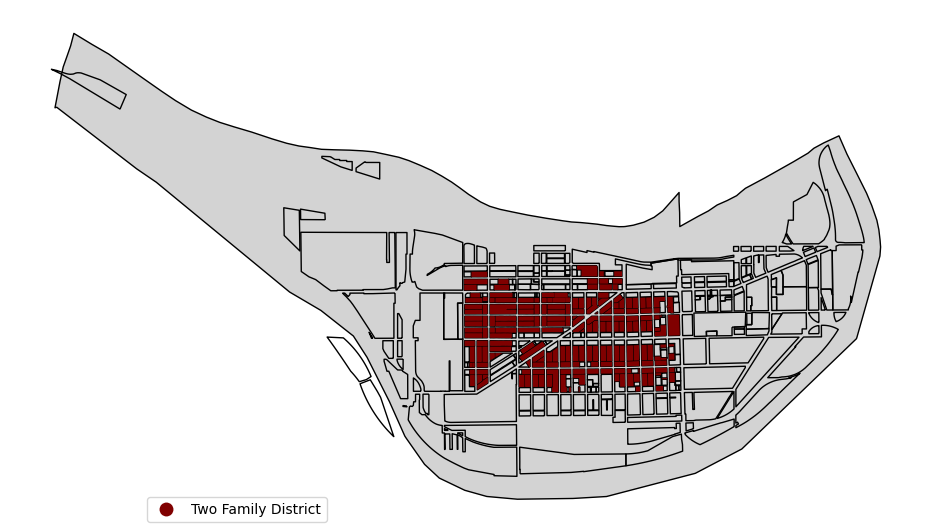

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
kc_zones.plot(ax=ax, ec='k', fc='None')
kc_zones[kc_zones['ZONENAME'].isin(['Single Family District','Two Family District'])].plot(ax=ax, column='ZONENAME',categorical=True, legend=True, 
              legend_kwds=dict(ncols=4, loc=(0.15,-0.)), cmap='jet_r')
armourdale.dissolve("CITY").plot(ax=ax, fc='lightgray', ec='k', zorder=-1)
# ax.minorticks_on()
# ax.grid(color='k')

plt.tight_layout()
ax.set_axis_off()

In [40]:
wy_bg.sjoin(armourdale, predicate='within')

,GEOID,geometry,index_right,VTD,VTD_S,CITY_CODE,CITY_PREF,WARD,PRECINCT,BPU,...,BPU_Member,BPU_At_Lg1,BPU_At_Lg2,BPU_At_Lg3,DATE_MOD,DATE_ADDED,MOD_BY,ADDED_BY,Shape_Leng,Shape_Area
77,202090426002,"POLYGON ((-94.64458 39.08921, -94.64242 39.089...",Kansas City,KC06-02,600310,1,KC,06,02,3,...,None,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07
110,202090426001,"POLYGON ((-94.64455 39.08409, -94.64453 39.084...",Kansas City,KC06-02,600310,1,KC,06,02,3,...,None,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07
111,202090426003,"POLYGON ((-94.64837 39.08002, -94.64833 39.080...",Kansas City,KC06-02,600310,1,KC,06,02,3,...,None,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07


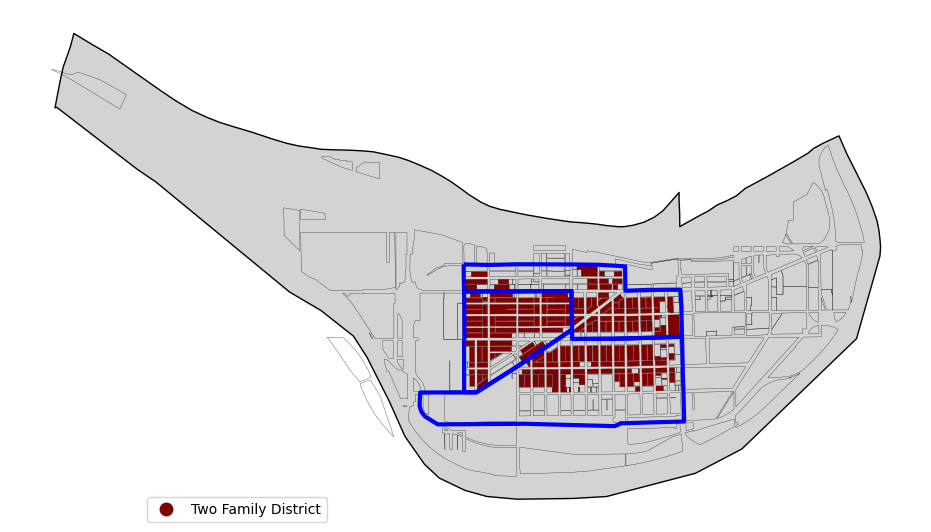

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
kc_zones.plot(ax=ax, ec='k', fc='None', lw=0.2)
kc_zones[kc_zones['ZONENAME'].isin(['Single Family District','Two Family District'])].plot(ax=ax, column='ZONENAME',categorical=True, legend=True, 
              legend_kwds=dict(ncols=4, loc=(0.15,-0.)), cmap='jet_r')
armourdale.dissolve("CITY").plot(ax=ax, fc='lightgray', ec='k', zorder=-1)
# ax.minorticks_on()
# ax.grid(color='k')
wy_bg.sjoin(armourdale, predicate='within').plot(ax=ax, fc='None', ec='b', lw=3)
plt.tight_layout()
ax.set_axis_off()